Word Cloud - for one chapter or whole text 

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [13]:
# Required Libraries
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import json
from general_functions.translation import translate_to_spanish
import heapq



# Constants
STOP_WORDS = set(stopwords.words('english'))
top_n = 50


# Functions

def top_n_values(dictionary, n):
    top_items = heapq.nlargest(n, dictionary.items(), key=lambda item: item[1])
    return dict(top_items)

def tokenize_and_filter(text):
    words = nltk.word_tokenize(text)
    return [word.lower() for word in words if word.isalpha() and word not in STOP_WORDS]

def word_frequencies(words):
    return Counter(words)

def generate_wordcloud_from_text(text):
    words = tokenize_and_filter(text)
    word_freq = word_frequencies(words)
    wc = WordCloud(stopwords=STOP_WORDS, background_color='white', max_words=100, width=800, height=400).generate_from_frequencies(word_freq)
    return wc

def save_to_json(data, output_path):
    with open(output_path, 'w', encoding='utf-8') as f:
        json.dump(data, f)

# Main Script
input_path = "../data/grimmcinderalla.txt"
output_path = "../data/wcloud.json"

with open(input_path, 'r', encoding='utf-8') as file:
    text_data = file.read().replace('\n', ' ')

wordcloud = generate_wordcloud_from_text(text_data)

# # Display the word cloud
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

# Save word frequencies in JSON
word_freq_data = word_frequencies(tokenize_and_filter(text_data))
word_freq_data = dict(word_freq_data)
word_freq_data = top_n_values(word_freq_data, top_n)

word_cloud_data = []
for i in word_freq_data:
    print(i, word_freq_data[i])
    item ={
        "word": i,
        "value": word_freq_data[i],
        "category": "Popular Words",
        "translation":  translate_to_spanish(i)
    }
    word_cloud_data.append(item)
save_to_json(word_cloud_data, output_path)
print(f"Word cloud data saved to {output_path}")




the 31
{'word': 'the', 'value': 31, 'category': 'Popular Words', 'translation': 'el'}
cinderella 28
{'word': 'cinderella', 'value': 28, 'category': 'Popular Words', 'translation': 'Cenicienta'}
said 20
{'word': 'said', 'value': 20, 'category': 'Popular Words', 'translation': 'dicho'}
pick 20
{'word': 'pick', 'value': 20, 'category': 'Popular Words', 'translation': 'elegir'}
tree 18
{'word': 'tree', 'value': 18, 'category': 'Popular Words', 'translation': 'árbol'}
prince 18
{'word': 'prince', 'value': 18, 'category': 'Popular Words', 'translation': 'Príncipe'}
one 17
{'word': 'one', 'value': 17, 'category': 'Popular Words', 'translation': 'uno'}
when 16
{'word': 'when', 'value': 16, 'category': 'Popular Words', 'translation': 'cuando'}
came 16
{'word': 'came', 'value': 16, 'category': 'Popular Words', 'translation': 'vino'}
go 16
{'word': 'go', 'value': 16, 'category': 'Popular Words', 'translation': 'ir'}
shoe 16
{'word': 'shoe', 'value': 16, 'category': 'Popular Words', 'translation':

## Sentiment analysis

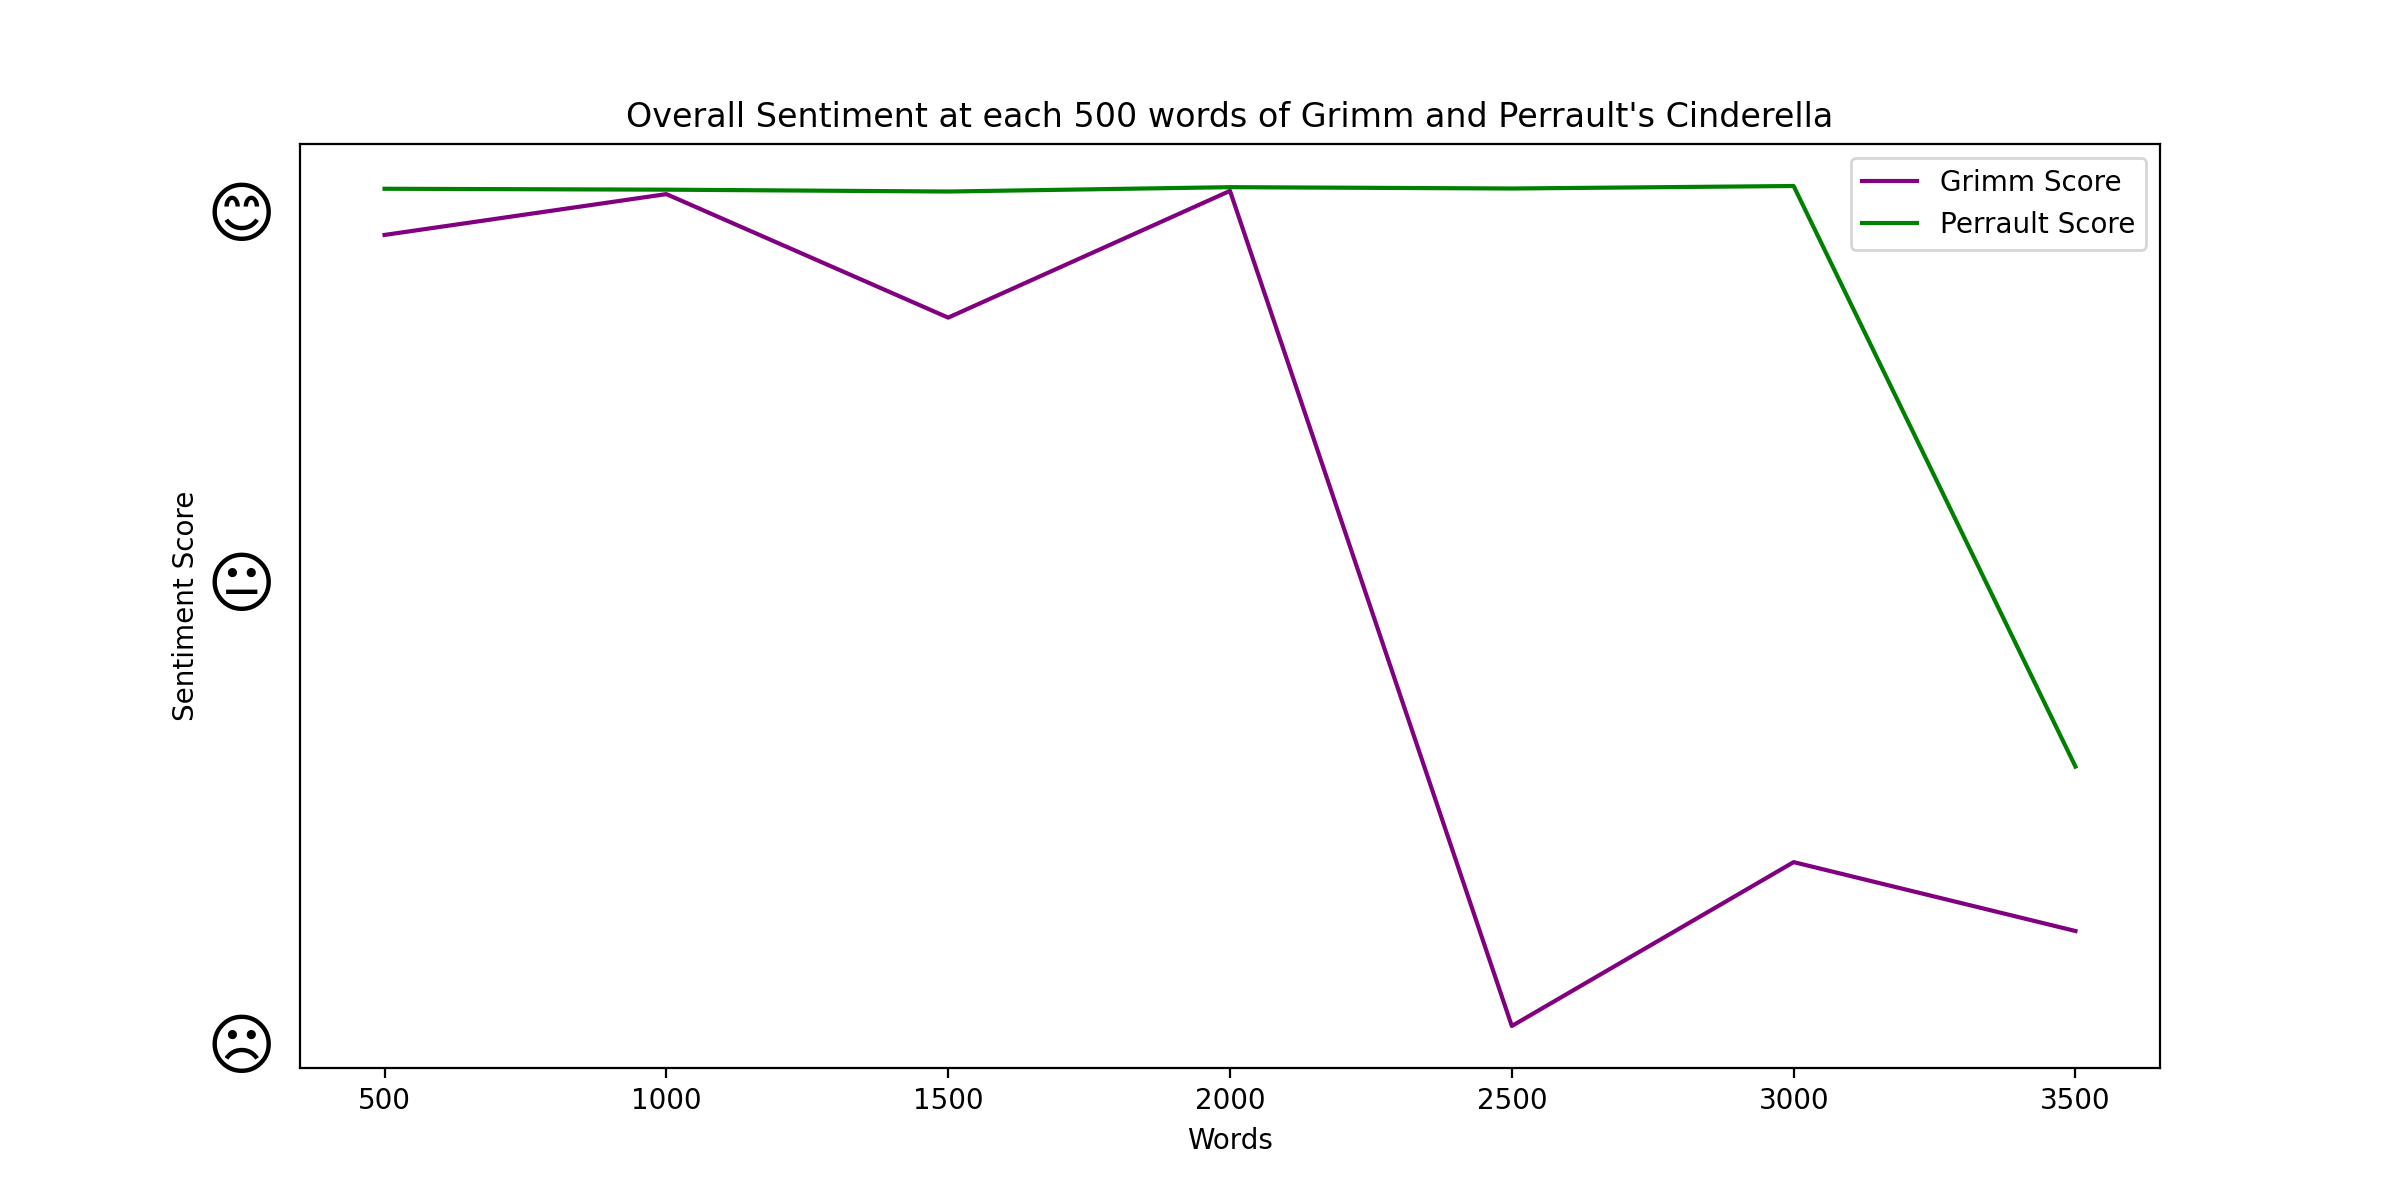

In [13]:
# THIS CODE WON'T RUN - FIXING IT 
import matplotlib.pyplot as plt

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Define a function to do the sentiment analysis and plot
def process_and_plot_sentiment(grimm_cinderella, perrault_cinderella, title, window_size=500):
    # Split the books into chunks of window_size words
    grimm_words = nltk.word_tokenize(grimm_cinderella)
    grimm_chunks = [' '.join(grimm_words[i:i+window_size]) for i in range(0, len(grimm_words), window_size)]

    perrault_words = nltk.word_tokenize(perrault_cinderella)
    perrault_chunks = [' '.join(perrault_words[i:i+window_size]) for i in range(0, len(perrault_words), window_size)]

    # Calculate compound sentiment scores for each chunk
    grimm_scores = [sia.polarity_scores(chunk)['compound'] for chunk in grimm_chunks]
    perrault_scores = [sia.polarity_scores(chunk)['compound'] for chunk in perrault_chunks]

    # Create a DataFrame from the compound scores
    df = pd.DataFrame({'Words': np.arange(window_size, (len(grimm_chunks)+1)*window_size, window_size),
                       'Grimm Score': grimm_scores,
                       'Perrault Score': perrault_scores})

    # Plot a line graph of the compound sentiment scores over the course of the books
    plt.figure(figsize=(12, 6))
    plt.plot(df['Words'], df['Grimm Score'], color='purple', label='Grimm Score')
    plt.plot(df['Words'], df['Perrault Score'], color='green', label='Perrault Score')

    plt.title(f'Overall Sentiment at each {window_size} words of Grimm and Perrault\'s Cinderella')
    plt.xlabel('Words')
    plt.ylabel('Sentiment Score', labelpad=36)  # increase labelpad to push the label further left
    
    # Add emojis at specified y values with increased size
    plt.annotate("😊", xy=(-0.05, 0.9), xycoords="axes fraction", fontsize=24)
    plt.annotate("😐", xy=(-0.05, 0.5), xycoords="axes fraction", fontsize=24)
    plt.annotate("☹️", xy=(-0.05, 0.0), xycoords="axes fraction", fontsize=24)

    plt.legend()

    # Clear the y-axis labels
    plt.yticks([])

    plt.savefig(f'figures/{title}_sentiment_plot.png', dpi=300)
    plt.show()

# Process and plot sentiment for both books
process_and_plot_sentiment(grimm_cinderella, perrault_cinderella, "Grimm_Perrault_Cinderella", window_size=500)
